<a href="https://colab.research.google.com/github/GulshanYasmeen/AI-DSA/blob/main/Govt_emp_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('/content/provincial-number-of-government-employees-by-grade-and-sex.csv')


In [4]:
data = data.drop(['Unnamed: 5'], axis =1)


In [5]:
data['Male'] = pd.to_numeric(data['Male'], errors='coerce')
data['Male']

0         8580.0
1         5321.0
2         1816.0
3         1739.0
4         3333.0
          ...   
1026    123296.0
1027     22676.0
1028      9408.0
1029     53052.0
1030     68438.0
Name: Male, Length: 1031, dtype: float64

In [6]:
data['Female'] = pd.to_numeric(data['Female'], errors='coerce')
data['Female']

0        488.0
1        465.0
2        155.0
3        735.0
4         53.0
         ...  
1026    2069.0
1027     426.0
1028     583.0
1029    2387.0
1030    4083.0
Name: Female, Length: 1031, dtype: float64

In [7]:
data['Year'] = pd.to_datetime(data['Year'], format ='%Y', errors='coerce')
data['Year']

0      2010-01-01
1      2010-01-01
2      2010-01-01
3      2010-01-01
4      2010-01-01
          ...    
1026          NaT
1027          NaT
1028          NaT
1029          NaT
1030          NaT
Name: Year, Length: 1031, dtype: datetime64[ns]

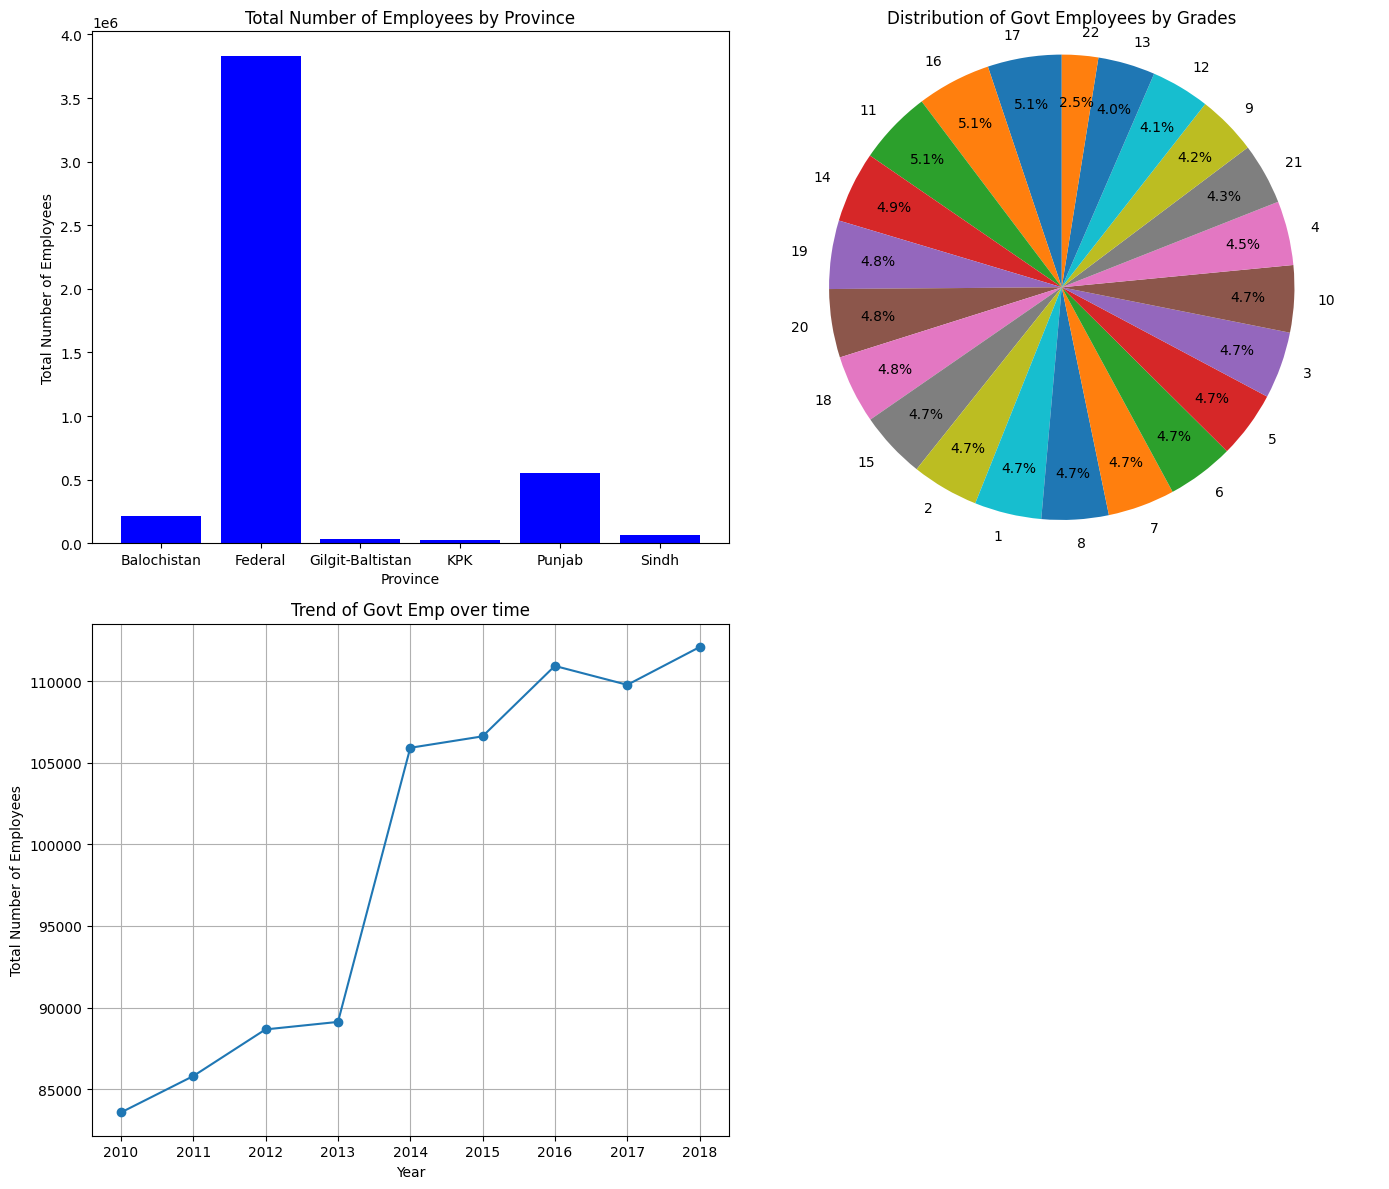

In [8]:
fig, axes = plt.subplots(2,2, figsize=(14,12))

total_employees_by_province = data.groupby('Province')[['Male','Female']].sum().sum(axis=1)
total_employees_by_province.values
axes[0,0].bar(total_employees_by_province.index, total_employees_by_province.values, color ='blue')
axes[0,0].set_xlabel('Province')
axes[0,0].set_ylabel('Total Number of Employees')
axes[0,0].set_title('Total Number of Employees by Province')

#plot2: distribution of govt emp by grade
grade_counts = data['Grade'].value_counts()
axes[0,1].pie(grade_counts,labels=grade_counts.index, autopct='%1.1f%%', radius=2, startangle=90,pctdistance=0.8)
axes[0,1].axis('equal')
axes[0,1].set_title('Distribution of Govt Employees by Grades')

#plot3: trends of govt emp over time
total_emp_over_time = data.groupby('Year')[['Male','Female']].sum().sum(axis=1)
axes[1,0].plot(total_emp_over_time, marker='o')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Total Number of Employees')
axes[1,0].set_title('Trend of Govt Emp over time')
axes[1,0].grid(True)

#remove empty subplot
fig.delaxes(axes[1,1])

#adjust spacing between subplots
plt.tight_layout()

plt.show()